In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
dataset = pd.read_csv("stroke.csv", header = 0)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# dataset['bmi'].fillna(dataset['bmi'].median(), inplace=True)
dataset.dropna(inplace=True)

In [ ]:
labels,counts = pd.factorize(dataset['gender'])
dataset['gender'] = labels
labels,counts = pd.factorize(dataset['ever_married'])
dataset['ever_married'] = labels
labels,counts = pd.factorize(dataset['work_type'])
dataset['work_type'] = labels
labels,counts = pd.factorize(dataset['Residence_type'])
dataset['Residence_type'] = labels
labels,counts = pd.factorize(dataset['smoking_status'])
dataset['smoking_status'] = labels

In [ ]:
dataset['ever_married']

0       0
2       0
3       0
4       0
5       0
       ..
5104    1
5106    0
5107    0
5108    0
5109    0
Name: ever_married, Length: 4909, dtype: int64

In [ ]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
X = preprocessing.normalize(X)
y

array([1, 1, 1, ..., 0, 0, 0])

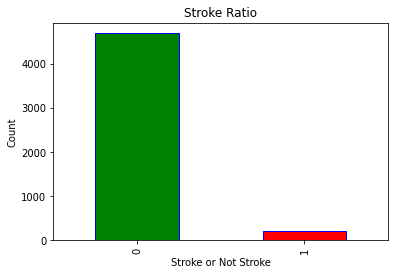

In [ ]:
plt.title('Stroke Ratio')
plt.xlabel('Stroke or Not Stroke')
plt.ylabel('Count')

dataset['stroke'].value_counts().plot.bar(color=['green', 'red'],edgecolor='blue')

In [ ]:
dataset['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

**Before SMOTE**

In [ ]:
def CFM(y_test, y_pred,clf):
  conf_matrix = confusion_matrix(y_test, y_pred)

  fig, ax = plt.subplots(figsize=(7.5, 7.5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
          
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title(f'Confusion Matrix of {clf}', fontsize=18)
  plt.show()


The accuracy is 95.742405085629

Before sampling without 5fold cv the accuracy is: 

without cv the accuracy of Logistic Regression is 96.41693811074919


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1184
           1       0.00      0.00      0.00        44

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.93      0.96      0.95      1228




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


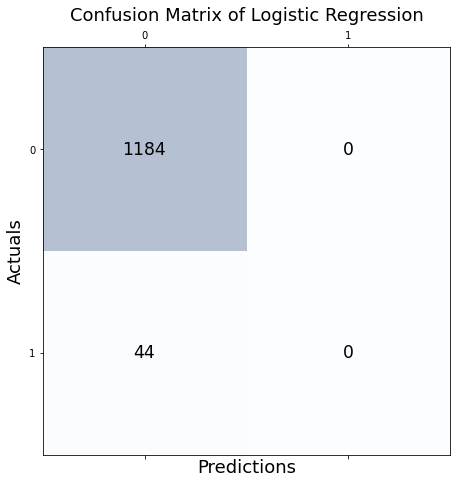

In [ ]:
#Logistic Regression
bscvacc={}

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avglog=[] #insert 5 accuracies to avg it later
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
    logistic_Regression.fit(x_train,y_train)
    pred_log = logistic_Regression.predict(x_test)
    log = accuracy_score(pred_log,y_test)*100
    avglog.append(log)
    



cvlog = sum(avglog)/len(avglog) # avg of 5 accuracy
print(f"The accuracy is {cvlog}")
li = {'Logistic Regression':cvlog}
bscvacc.update(li)


print("")
print("Before sampling without 5fold cv the accuracy is: \n")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=114)

logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(x_train,y_train)
pred_log = logistic_Regression.predict(x_test)
log = accuracy_score(pred_log,y_test)*100
print(f"without cv the accuracy of Logistic Regression is {log}\n\n")
print(classification_report(y_test, pred_log))
print("")
CFM(y_test, pred_log,"Logistic Regression")



In [ ]:
precision_recall_fscore_support(y_test, pred_log, average='macro')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.4820846905537459, 0.5, 0.49087893864013266, None)

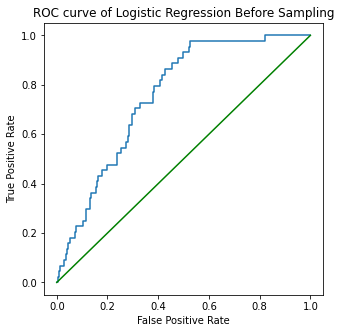

In [ ]:
y_proba = logistic_Regression.predict_proba(x_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred,clf):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title(f"ROC curve of {clf}")

plot_sklearn_roc_curve(y_test, y_proba[:, 1],"Logistic Regression Before Sampling")

The accuracy is 92.31996528750953

Before sampling without 5fold cv the accuracy is: 

without cv the accuracy of Decision Tree Classifier is 92.99674267100977


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1184
           1       0.04      0.05      0.04        44

    accuracy                           0.93      1228
   macro avg       0.50      0.50      0.50      1228
weighted avg       0.93      0.93      0.93      1228




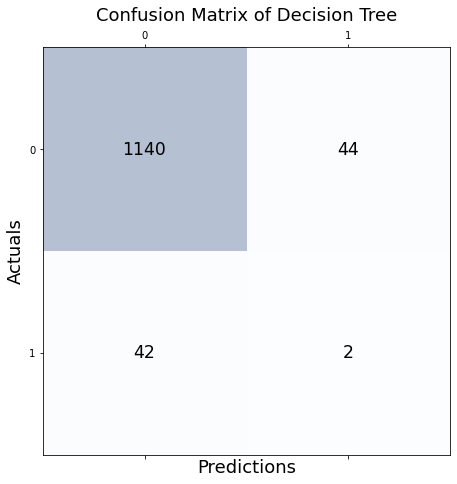

In [ ]:


#Decision Tree
cv = KFold(n_splits=5, random_state=114, shuffle=True)
avgdt=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    dt = DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=0)
    dt.fit(x_train,y_train)
    pred_dt = dt.predict(x_test)
    dta = accuracy_score(pred_dt,y_test)*100
    avgdt.append(dta)
    


cvdt = sum(avgdt)/len(avgdt)
print(f"The accuracy is {cvdt}")
ddt = {'DT':cvdt}
bscvacc.update(ddt)




print("")
print("Before sampling without 5fold cv the accuracy is: \n")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=114)

dt = DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=0)
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
dta = accuracy_score(pred_dt,y_test)*100
print(f"without cv the accuracy of Decision Tree Classifier is {dta}\n\n")
print(classification_report(y_test, pred_dt))
print("")
CFM(y_test, pred_dt,"Decision Tree")




In [ ]:
precision_recall_fscore_support(y_test, pred_dt, average='macro')

(0.5039726329728537, 0.5041461916461917, 0.5040480886634733, None)

Text(0, 0.5, 'error rate')

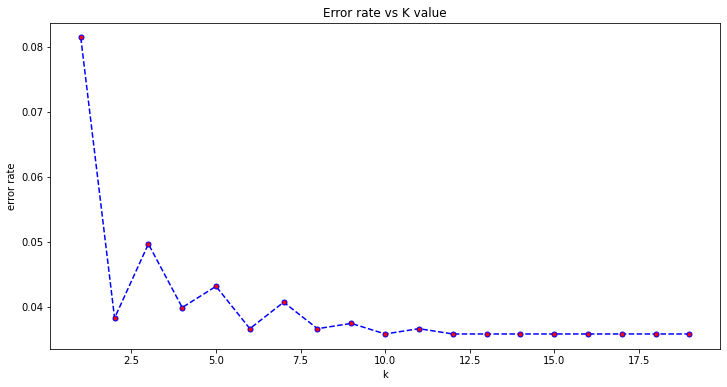

In [ ]:
#find optimum k for KNN
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=114)
error=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,20),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=5)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

The accuracy is 95.742405085629

Before sampling without 5fold cv the accuracy is: 

without cv the accuracy of KNN is 96.33550488599349


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1184
           1       0.00      0.00      0.00        44

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.93      0.96      0.95      1228




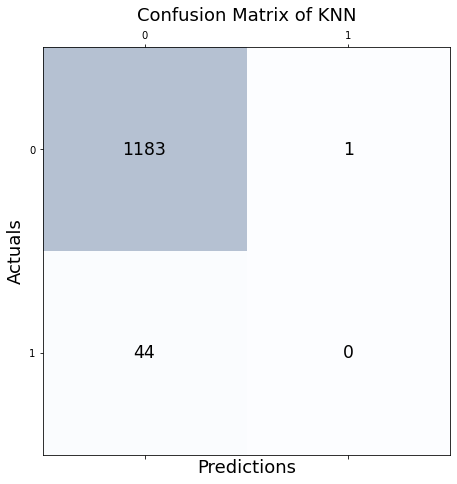

In [ ]:
#KNN
cv = KFold(n_splits=5, random_state=114, shuffle=True)
avgknn=[]


for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    knn2 = KNeighborsClassifier(n_neighbors=11)
    knn2.fit(x_train,y_train)
    pred_knn2 = knn2.predict(x_test)
    KNN2 = accuracy_score(pred_knn2,y_test)*100
    avgknn.append(KNN2)



cvknn = sum(avgknn)/len(avgknn)
print(f"The accuracy is {cvknn}")
kk = {'KNN':cvknn}
bscvacc.update(kk)



print("")
print("Before sampling without 5fold cv the accuracy is: \n")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=114)


knn2 = KNeighborsClassifier(n_neighbors=11)
knn2.fit(x_train,y_train)
pred_knn2 = knn2.predict(x_test)
KNN2 = accuracy_score(pred_knn2,y_test)*100
print(f"without cv the accuracy of KNN is {KNN2}\n\n")
print(classification_report(y_test, pred_knn2))
print("")
CFM(y_test, pred_knn2,"KNN")



In [ ]:
precision_recall_fscore_support(y_test, pred_knn2, average='macro')

(0.4820700896495517, 0.4995777027027027, 0.49066777270841977, None)

### **After** **SMOTE**

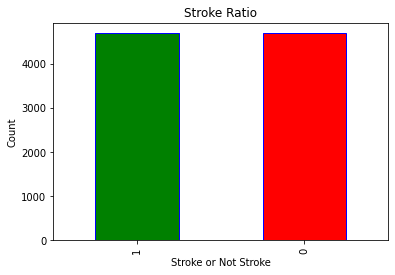

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
Xnew, Ynew = smote.fit_resample(X,y)
no0=(Ynew==0).sum()
no1=len(Ynew)-no0

Newd = {
  "Stroke": Ynew
}

#load data into a DataFrame object:
df = pd.DataFrame(Newd)
df



plt.title('Stroke Ratio')
plt.xlabel('Stroke or Not Stroke')
plt.ylabel('Count')

df['Stroke'].value_counts().plot.bar(color=['green', 'red'],edgecolor='blue')

In [ ]:
df['Stroke'].value_counts()

1    4700
0    4700
Name: Stroke, dtype: int64

The accuracy is 70.72340425531915

After sampling without 5fold cv the accuracy is: 

without cv the accuracy of Logistic Regression is 70.3404255319149


              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1158
           1       0.69      0.75      0.72      1192

    accuracy                           0.70      2350
   macro avg       0.70      0.70      0.70      2350
weighted avg       0.70      0.70      0.70      2350




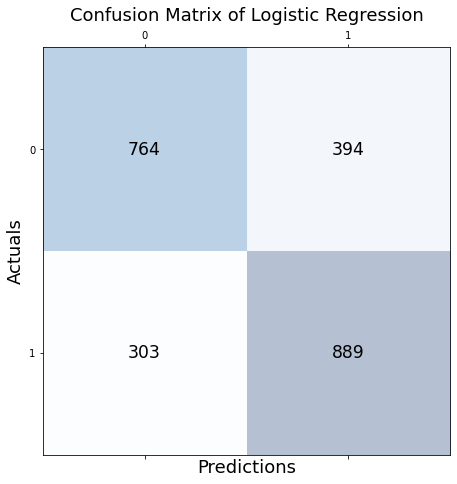

In [ ]:
#logistic Regression

ascvacc={}

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avglog=[]
for train_index, test_index in cv.split(Xnew):
    x_train, x_test, y_train, y_test = Xnew[train_index], Xnew[test_index], Ynew[train_index], Ynew[test_index]

    logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
    logistic_Regression.fit(x_train,y_train)
    pred_log = logistic_Regression.predict(x_test)
    log = accuracy_score(pred_log,y_test)*100
    
    avglog.append(log)


cvlog = sum(avglog)/len(avglog)
print(f"The accuracy is {cvlog}")
li = {'Logistic Regression':cvlog}
ascvacc.update(li)




print("")
print("After sampling without 5fold cv the accuracy is: \n")

x_train, x_test, y_train, y_test = train_test_split(Xnew, Ynew, test_size = 0.25, random_state=114)

logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(x_train,y_train)
pred_log = logistic_Regression.predict(x_test)
log = accuracy_score(pred_log,y_test)*100
print(f"without cv the accuracy of Logistic Regression is {log}\n\n")
print(classification_report(y_test, pred_log))
print("")
CFM(y_test, pred_log,"Logistic Regression")


In [ ]:
precision_recall_fscore_support(y_test, pred_log, average='macro')

(0.7044667452177236, 0.7027817864635857, 0.7025627057087731, None)

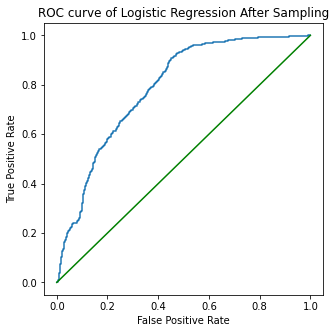

In [ ]:
y_proba = logistic_Regression.predict_proba(x_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred,clf):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title(f"ROC curve of {clf}")
    
plot_sklearn_roc_curve(y_test, y_proba[:, 1],"Logistic Regression After Sampling")

The accuracy is 90.15957446808511

After sampling without 5fold cv the accuracy is: 

without cv the accuracy of Decision Tree Classifier is 93.87234042553192


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1158
           1       0.94      0.94      0.94      1192

    accuracy                           0.94      2350
   macro avg       0.94      0.94      0.94      2350
weighted avg       0.94      0.94      0.94      2350




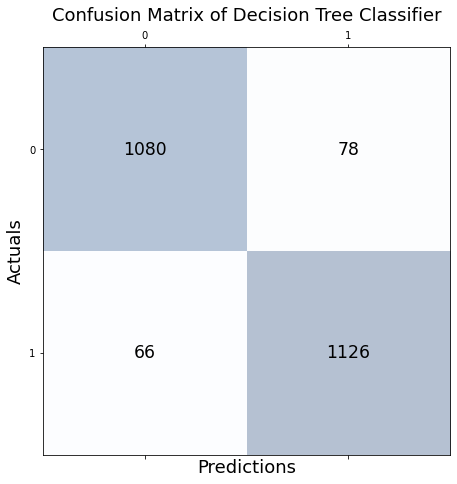

In [ ]:
#Decision Tree
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
Xnew, Ynew = smote.fit_resample(X,y)


cv = KFold(n_splits=5, random_state=114, shuffle=True)
avgdt=[]
for train_index, test_index in cv.split(Xnew):
    x_train, x_test, y_train, y_test = Xnew[train_index], Xnew[test_index], Ynew[train_index], Ynew[test_index]

    

    dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=0)
    dt.fit(x_train,y_train)
    pred_dt = dt.predict(x_test)
    dta = accuracy_score(pred_dt,y_test)*100
    avgdt.append(dta)


cvdt = sum(avgdt)/len(avgdt)
print(f"The accuracy is {cvdt}")
ddt = {'DT':cvdt}
ascvacc.update(ddt)





print("")
print("After sampling without 5fold cv the accuracy is: \n")

x_train, x_test, y_train, y_test = train_test_split(Xnew, Ynew, test_size = 0.25, random_state=114)



dt = DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=0)
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
dta = accuracy_score(pred_dt,y_test)*100
print(f"without cv the accuracy of Decision Tree Classifier is {dta}\n\n")
print(classification_report(y_test, pred_dt))
print("")
CFM(y_test, pred_dt,"Decision Tree Classifier")




In [ ]:
precision_recall_fscore_support(y_test, pred_dt, average='macro')

(0.9388121619036023, 0.9386366797649268, 0.9386999165275458, None)

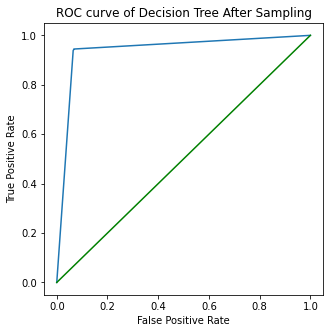

In [ ]:
y_proba = dt.predict_proba(x_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred,clf):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title(f"ROC curve of {clf}")

plot_sklearn_roc_curve(y_test, y_proba[:, 1],"Decision Tree After Sampling")

The accuracy is 84.96808510638297

After sampling without 5fold cv the accuracy is: 

without cv the accuracy of KNN is 84.25531914893617


              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1158
           1       0.78      0.96      0.86      1192

    accuracy                           0.84      2350
   macro avg       0.86      0.84      0.84      2350
weighted avg       0.86      0.84      0.84      2350




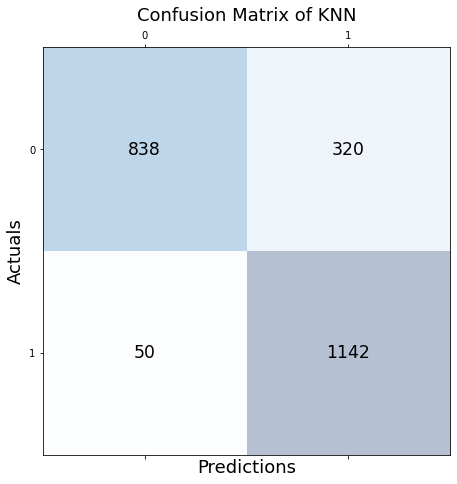

In [ ]:
#KNN
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
Xnew, Ynew = smote.fit_resample(X,y)


cv = KFold(n_splits=5, random_state=114, shuffle=True)
avgknn=[]


for train_index, test_index in cv.split(Xnew):
    x_train, x_test, y_train, y_test = Xnew[train_index], Xnew[test_index], Ynew[train_index], Ynew[test_index]

    knn2 = KNeighborsClassifier(n_neighbors=11)
    knn2.fit(x_train,y_train)
    pred_knn2 = knn2.predict(x_test)
    KNN2 = accuracy_score(pred_knn2,y_test)*100

    avgknn.append(KNN2)

cvknn = sum(avgknn)/len(avgknn)
print(f"The accuracy is {cvknn}")
kk = {'KNN':cvknn}
ascvacc.update(kk)


print("")
print("After sampling without 5fold cv the accuracy is: \n")

x_train, x_test, y_train, y_test = train_test_split(Xnew, Ynew, test_size = 0.25, random_state=114)


knn2 = KNeighborsClassifier(n_neighbors=11)
knn2.fit(x_train,y_train)
pred_knn2 = knn2.predict(x_test)
KNN2 = accuracy_score(pred_knn2,y_test)*100
print(f"without cv the accuracy of KNN is {KNN2}\n\n")
print(classification_report(y_test, pred_knn2))
print("")
CFM(y_test, pred_knn2,"KNN")






In [ ]:
precision_recall_fscore_support(y_test, pred_knn2, average='macro')

(0.8624077223598428, 0.8408575882973421, 0.8398735636502125, None)

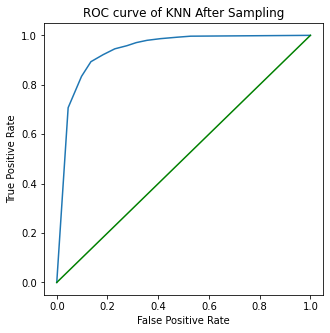

In [ ]:
y_proba = knn2.predict_proba(x_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred,clf):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title(f"ROC curve of {clf}")
plot_sklearn_roc_curve(y_test, y_proba[:, 1],"KNN After Sampling")
